# Property Address Classification - Exploratory Data Analysis

**Goal:** Understand the dataset and identify patterns to inform model selection

**Key Questions:**
1. How balanced are the classes?
2. What are the text characteristics?
3. What are the discriminative features?
4. What challenges should we expect?

---

## Setup & Load Data

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Load data
train_df = pd.read_excel('../data/Training.xlsx')
test_df = pd.read_excel('../data/Validation.xlsx')

print('='*80)
print('DATASET LOADED')
print('='*80)
print(f'Training: {len(train_df):,} samples')
print(f'Test: {len(test_df):,} samples')
print(f'Total: {len(train_df) + len(test_df):,} samples')
print(f'\nColumns: {list(train_df.columns)}')
print('\nFirst 3 rows:')
train_df.head(3)

DATASET LOADED
Training: 8,936 samples
Test: 2,681 samples
Total: 11,617 samples

Columns: ['property_address', 'categories']

First 3 rows:


,property_address,categories
0,"New Ppid 1Kqttmg7, House, Property Id No.58C57...",houseorplot
1,"Property Of Rs No.12/2,Plot No. 01,House Numbe...",houseorplot
2,"Flat-504,Floor-5 Shanti Vista-Ii Wing C Bldg 9...",flat


## Class Distribution

CLASS DISTRIBUTION
commercial unit     :  965 ( 10.8%) █████
flat                : 3232 ( 36.2%) ██████████████████
houseorplot         : 2673 ( 29.9%) ██████████████
landparcel          :  869 (  9.7%) ████
others              : 1197 ( 13.4%) ██████


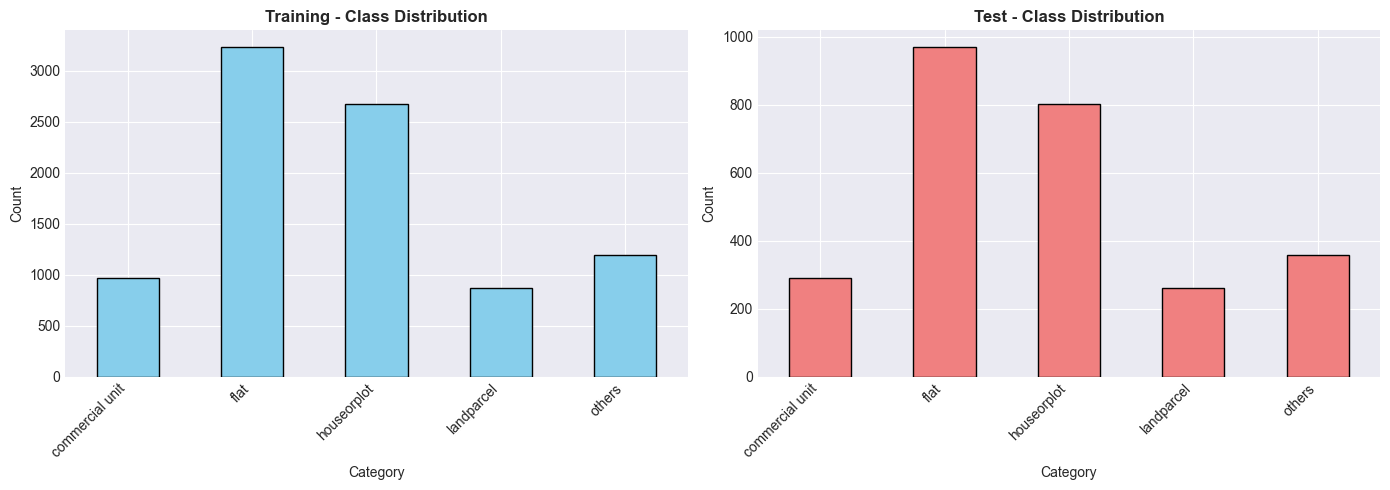


Imbalanced dataset: 9.7% to 36.2%


In [16]:

print('='*80)
print('CLASS DISTRIBUTION')
print('='*80)

train_counts = train_df['categories'].value_counts().sort_index()
train_pct = (train_counts / len(train_df) * 100)

for cat in train_counts.index:
    bar = '█' * int(train_pct[cat] / 2)
    print(f'{cat:20s}: {train_counts[cat]:4d} ({train_pct[cat]:5.1f}%) {bar}')

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

train_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Training - Class Distribution', fontweight='bold')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

test_df['categories'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Test - Class Distribution', fontweight='bold')
ax2.set_xlabel('Category')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../assets/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\nImbalanced dataset: {train_pct.min():.1f}% to {train_pct.max():.1f}%')

## Address Length Analysis

LENGTH ANALYSIS
Mean length: 145.8 chars
Median: 128 chars
90th percentile: 236 chars
Max: 1004 chars


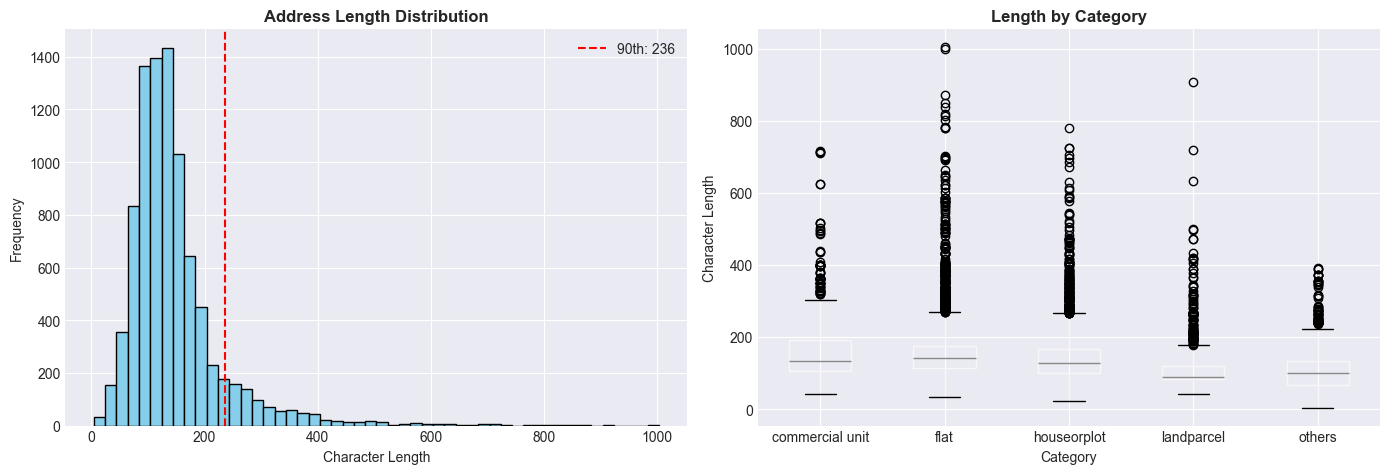

In [17]:

train_df['char_length'] = train_df['property_address'].astype(str).str.len()
train_df['word_count'] = train_df['property_address'].astype(str).str.split().str.len()

print('='*80)
print('LENGTH ANALYSIS')
print('='*80)
print(f'Mean length: {train_df["char_length"].mean():.1f} chars')
print(f'Median: {train_df["char_length"].median():.0f} chars')
print(f'90th percentile: {train_df["char_length"].quantile(0.90):.0f} chars')
print(f'Max: {train_df["char_length"].max()} chars')

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['char_length'], bins=50, color='skyblue', edgecolor='black')
axes[0].axvline(train_df['char_length'].quantile(0.90), color='red', linestyle='--', 
                label=f'90th: {train_df["char_length"].quantile(0.90):.0f}')
axes[0].set_xlabel('Character Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Address Length Distribution', fontweight='bold')
axes[0].legend()

train_df.boxplot(column='char_length', by='categories', ax=axes[1])
axes[1].set_title('Length by Category', fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Character Length')
plt.suptitle('')

plt.tight_layout()
plt.savefig('../assets/length_analysis.png', dpi=150, bbox_inches='tight')
plt.show()


VOCABULARY
Total words: 171,336
Unique words: 15,544

Top 20 words:
  no             : 14812
  floor          :  3256
  plot           :  3160
  s              :  3112
  flat           :  2393
  road           :  2371
  village        :  2070
  near           :  1680
  a              :  1629
  nagar          :  1588
  and            :  1549
  of             :  1405
  b              :  1268
  p              :  1177
  at             :  1165
  maharashtra    :  1053
  india          :   970
  sq             :   961
  situated       :   935
  pradesh        :   927


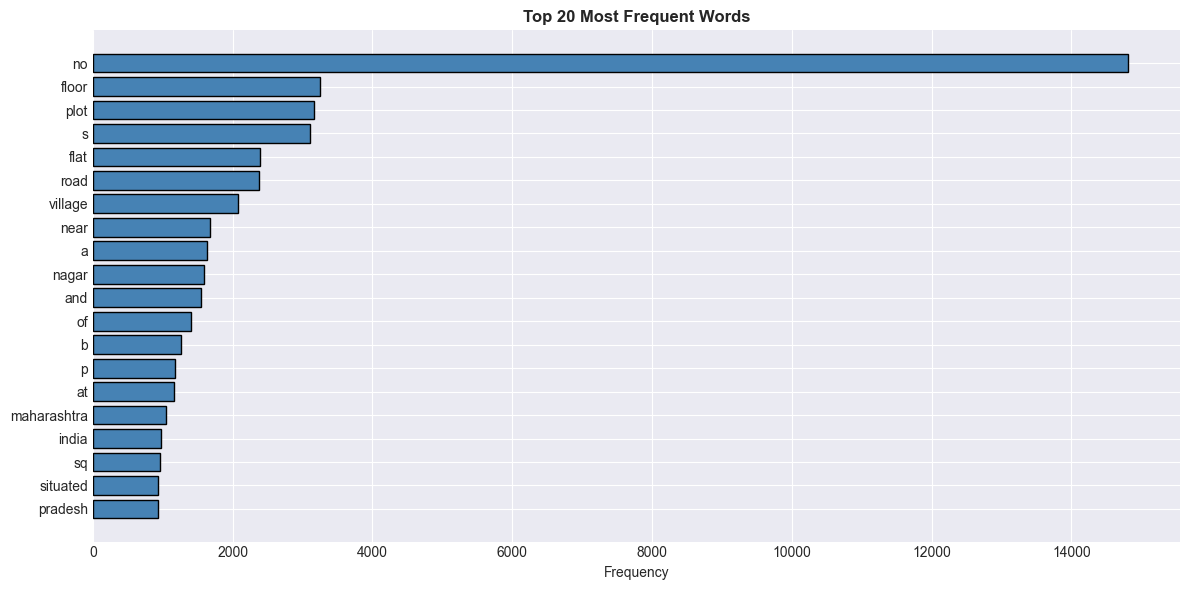

In [19]:
# Cell 4: Vocabulary Analysis
all_text = ' '.join(train_df['property_address'].astype(str).str.lower())
words = re.findall(r'\b[a-zA-Z]+\b', all_text)  # ← FIXED HERE
word_freq = Counter(words)

print('='*80)
print('VOCABULARY')
print('='*80)
print(f'Total words: {len(words):,}')
print(f'Unique words: {len(word_freq):,}')
print(f'\nTop 20 words:')
for word, count in word_freq.most_common(20):
    print(f'  {word:15s}: {count:5d}')

# Visualization
top_20 = dict(word_freq.most_common(20))
plt.figure(figsize=(12, 6))
plt.barh(list(top_20.keys()), list(top_20.values()), color='steelblue', edgecolor='black')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../assets/vocabulary.png', dpi=150, bbox_inches='tight')
plt.show()



## Class-Specific Keywords

In [22]:

print('='*80)
print('CLASS-SPECIFIC KEYWORDS')
print('='*80)

def get_top_words(df, category, n=10):
    text = ' '.join(df[df['categories'] == category]['property_address'].astype(str).str.lower())
    words = re.findall(r'\b[a-zA-Z]+\b', text) 
    return Counter(words).most_common(n)

for cat in sorted(train_df['categories'].unique()):
    print(f'\n{cat.upper()}:')
    for word, count in get_top_words(train_df, cat):
        print(f'  {word:15s}: {count:4d}')

# Landparcel signals
print('\n' + '='*80)
print('LANDPARCEL SIGNALS (Critical!)')
print('='*80)
landparcel_df = train_df[train_df['categories'] == 'landparcel']
signals = ['khasra', 'survey', 'gata', 'pargana']

for signal in signals:
    count = landparcel_df['property_address'].str.lower().str.contains(signal).sum()
    pct = count / len(landparcel_df) * 100
    print(f'{signal:15s}: {count:3d} ({pct:5.1f}%)')

total_with = landparcel_df['property_address'].str.lower().str.contains('|'.join(signals)).sum()
print(f'\nTotal with signals: {total_with}/{len(landparcel_df)} ({total_with/len(landparcel_df)*100:.1f}%)')


CLASS-SPECIFIC KEYWORDS

COMMERCIAL UNIT:
  no             : 2174
  shop           :  661
  floor          :  555
  road           :  547
  ground         :  302
  s              :  293
  near           :  240
  a              :  233
  plot           :  222
  and            :  211

FLAT:
  no             : 5381
  floor          : 2552
  flat           : 2371
  s              : 1537
  plot           : 1114
  road           :  915
  a              :  880
  maharashtra    :  768
  b              :  758
  village        :  673

HOUSEORPLOT:
  no             : 4886
  plot           : 1742
  village        :  837
  house          :  771
  s              :  729
  nagar          :  639
  of             :  617
  and            :  572
  india          :  539
  at             :  498

LANDPARCEL:
  no             : 1269
  near           :  352
  s              :  251
  village        :  204
  khasra         :  199
  tehsil         :  162
  survey         :  156
  school         :  134
  and       

## Data Quality

In [23]:

print('='*80)
print('DATA QUALITY')
print('='*80)

print('Missing values:', train_df.isnull().sum().sum())
print('Duplicates:', train_df.duplicated(subset=['property_address']).sum())
print('\nSpecial characters:')
for char in [',', '.', '/', '-', '#']:
    count = train_df['property_address'].str.contains(re.escape(char), regex=True).sum()
    print(f"  '{char}': {count} ({count/len(train_df)*100:.1f}%)")

has_nums = train_df['property_address'].str.contains(r'\\d').sum()
print(f'\nWith numbers: {has_nums} ({has_nums/len(train_df)*100:.1f}%)')



DATA QUALITY
Missing values: 0
Duplicates: 329

Special characters:
  ',': 7212 (80.7%)
  '.': 4263 (47.7%)
  '/': 4127 (46.2%)
  '-': 5200 (58.2%)
  '#': 27 (0.3%)

With numbers: 0 (0.0%)


## Train-Test Split Quality

In [27]:

print('='*80)
print('TRAIN-TEST SPLIT')
print('='*80)

train_dist = train_df['categories'].value_counts(normalize=True) * 100
test_dist = test_df['categories'].value_counts(normalize=True) * 100

print(f'{"Category":20s} {"Train %":>10s} {"Test %":>10s} {"Diff":>8s}')
print('-' * 52)
for cat in sorted(train_dist.index):
    tr = train_dist[cat]
    te = test_dist[cat] if cat in test_dist.index else 0
    diff = abs(tr - te)

    print(f'{cat:20s} {tr:9.2f}% {te:9.2f}% {diff:7.2f}%')


TRAIN-TEST SPLIT
Category                Train %     Test %     Diff
----------------------------------------------------
commercial unit          10.80%     10.82%    0.02%
flat                     36.17%     36.18%    0.01%
houseorplot              29.91%     29.91%    0.00%
landparcel                9.72%      9.70%    0.03%
others                   13.40%     13.39%    0.00%


##  Potential Confusion Patterns

In [30]:

print('='*80)
print('CONFUSION PATTERNS')
print('='*80)

print('\n1. FLAT vs HOUSEORPLOT:')
print('   - Overlap: "house", "no", "road"')
print('   - Example: "house no 123" could be either')

print('\n2. LANDPARCEL vs HOUSEORPLOT:')
print('   - Overlap: "plot", "village"')
print('   - Only 10% landparcel have "khasra/survey"')
print('   - Need context understanding!')

print('\n3. OTHERS category:')
print('   - Catch-all: offices, warehouses, misc')
print('   - Inherently ambiguous\n')

print('High vocabulary overlap → BERT > SVM')
print('Context is critical for disambiguation')

CONFUSION PATTERNS

1. FLAT vs HOUSEORPLOT:
   - Overlap: "house", "no", "road"
   - Example: "house no 123" could be either

2. LANDPARCEL vs HOUSEORPLOT:
   - Overlap: "plot", "village"
   - Only 10% landparcel have "khasra/survey"
   - Need context understanding!

3. OTHERS category:
   - Catch-all: offices, warehouses, misc
   - Inherently ambiguous

High vocabulary overlap → BERT > SVM
Context is critical for disambiguation


## Key Statistics Summary

In [31]:

print('='*80)
print('EDA SUMMARY')
print('='*80)

print('\nDATASET:')
print(f'  Total samples: {len(train_df):,}')
print(f'  Classes: {train_df["categories"].nunique()}')
print(f'  Imbalance: {train_df["categories"].value_counts().min()} to {train_df["categories"].value_counts().max()}')

print('\nTEXT CHARACTERISTICS:')
print(f'  Avg length: {train_df["char_length"].mean():.0f} chars')
print(f'  90th percentile: {train_df["char_length"].quantile(0.90):.0f} chars')
print(f'  Vocabulary: {len(word_freq):,} unique words')
print('  Language: Mixed Hindi + English')

print('\nCHALLENGES:')
print('   Class imbalance (landparcel: 10%)')
print('   Weak landparcel signals (only 10%)')
print('   High vocabulary overlap')
print('   Others is catch-all category')

print('\nRECOMMENDATIONS:')
print('   Use class weights')
print('   Multilingual model (IndicBERT/XLM-R)')
print('   Minimal preprocessing')
print('   MAX_LENGTH = 112')
print('   Focus on hard classes: landparcel, others')

EDA SUMMARY

DATASET:
  Total samples: 8,936
  Classes: 5
  Imbalance: 869 to 3232

TEXT CHARACTERISTICS:
  Avg length: 146 chars
  90th percentile: 236 chars
  Vocabulary: 15,544 unique words
  Language: Mixed Hindi + English

CHALLENGES:
   Class imbalance (landparcel: 10%)
   Weak landparcel signals (only 10%)
   High vocabulary overlap
   Others is catch-all category

RECOMMENDATIONS:
   Use class weights
   Multilingual model (IndicBERT/XLM-R)
   Minimal preprocessing
   MAX_LENGTH = 112
   Focus on hard classes: landparcel, others


In [11]:
# Cell 10: Sample Addresses
print('='*80)
print('SAMPLE ADDRESSES (3 per class)')
print('='*80)

for cat in sorted(train_df['categories'].unique()):
    print(f'\n{cat.upper()}:')
    samples = train_df[train_df['categories'] == cat].sample(3, random_state=42)
    for idx, row in samples.iterrows():
        addr = row['property_address'][:80]  # Truncate for display
        print(f'  • {addr}')

print('\n' + '='*80)
print('EDA COMPLETE! Ready for model training.')
print('='*80)

SAMPLE ADDRESSES (3 per class)

COMMERCIAL UNIT:
  • Plot-786 New Vision Township 652.135 Acres Plot 642 - 226(845 Shop),S No111/11Pt
  • Na, -, Instakart Services Private Limited And Shreyash Retail Private Limited, S
  • Office No-869-A Apex Commercial Centre Varachha Main Road Surat Surat Gujarat 39

FLAT:
  • Flat 1003, 10Th Floor, Tower 3 , Block C, Bptp Freedom Park, Flat 1003, Tower 3 
  • 31 G-843/572 Ist Floor Without Roof Rights Rect. No 745, Killa No. 135/257 & 294
  • 504 5 Block A Tremont 90Near Vaishnadevi Circle S P Ring Road Khoraj Gandhinagar

HOUSEORPLOT:
  • Address:Na, Nanasite No. F-08, Eagleton- The Golf Village, Khatha No.486/F-08, B
  • Plot No 283, Khasra No 4 11 12 1, 13 1 17 2 18 19 20 1, 21 2 22 2 24 23 10 2 2 3
  • House On,Plot Resurvey No 424/121 Of4.25 Ares Blckkayamkulam Karthikapallyalappu

LANDPARCEL:
  • Khasra No. 273/2, Mandal Rajarhat, Opposite Primary School, Pune, Maharashtra - 
  • R.S. No. 866/7, Pargana Sundarpur, Opposite Post Office, Mohali